In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.models import Sequential
from keras.layers import LSTM ,Dense, Dropout
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train =pd.read_csv("../input/digit-recognizer/train.csv") 
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.info

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       

In [7]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [9]:
# Label = np.arange(1,28001,1)  #Arange will create an array of numbers from 1 to 28000, used as index here
# result = pd.DataFrame(index = Label) #creating a dataframe of the result
# result['Label'] = pred #The label column of the result dataframe is the predictions done
# result.set_index(Label) 
# result.index.name = 'ImageId'
# result

In [10]:
X=train.drop(columns=['label'])
y=train['label']



<AxesSubplot:>

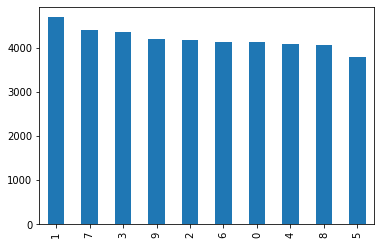

In [11]:
## Getting the value counts for each labels
val_cnt=y.value_counts()

## plotting the results
val_cnt.plot(kind='bar')

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precission:",metrics.precision_score(y_test, y_pred,average='weighted'))
    print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    plot_confusion_matrix(model, x_test, y_test)
    plt.show()


**Decision Tree**

Accuracy: 0.8606666666666667
Precission: 0.8607389307848955
Recall: 0.8606666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1025
           1       0.94      0.96      0.95      1146
           2       0.87      0.85      0.86      1072
           3       0.83      0.79      0.81      1151
           4       0.87      0.86      0.87      1024
           5       0.78      0.81      0.80       898
           6       0.88      0.87      0.88      1010
           7       0.88      0.89      0.89      1135
           8       0.81      0.80      0.80      1005
           9       0.80      0.83      0.81      1034

    accuracy                           0.86     10500
   macro avg       0.86      0.86      0.86     10500
weighted avg       0.86      0.86      0.86     10500



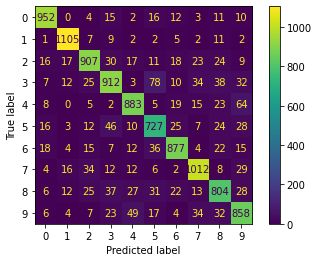

In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
classify(model)

**Cart Decision tree**

Accuracy: 0.8519047619047619
Precission: 0.8517918631148267
Recall: 0.8519047619047619
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1025
           1       0.92      0.95      0.93      1146
           2       0.83      0.81      0.82      1072
           3       0.80      0.81      0.81      1151
           4       0.84      0.86      0.85      1024
           5       0.80      0.81      0.80       898
           6       0.91      0.89      0.90      1010
           7       0.89      0.88      0.89      1135
           8       0.79      0.79      0.79      1005
           9       0.81      0.80      0.81      1034

    accuracy                           0.85     10500
   macro avg       0.85      0.85      0.85     10500
weighted avg       0.85      0.85      0.85     10500



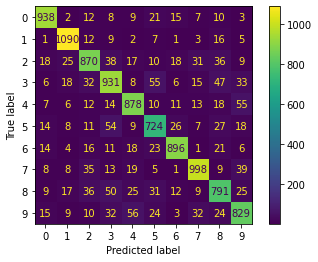

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
classify(model)

**KNN**

Accuracy: 0.9480952380952381
Precission: 0.9495917058480584
Recall: 0.9480952380952381
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1025
           1       0.89      1.00      0.94      1146
           2       0.99      0.91      0.95      1072
           3       0.95      0.94      0.94      1151
           4       0.98      0.95      0.96      1024
           5       0.95      0.95      0.95       898
           6       0.96      0.98      0.97      1010
           7       0.94      0.95      0.94      1135
           8       0.98      0.89      0.93      1005
           9       0.91      0.94      0.93      1034

    accuracy                           0.95     10500
   macro avg       0.95      0.95      0.95     10500
weighted avg       0.95      0.95      0.95     10500



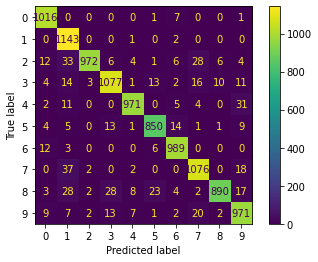

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=30)
classify(model)

**Random Forest Classifier**

Accuracy: 0.9638095238095238
Precission: 0.9638112296897646
Recall: 0.9638095238095238
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1025
           1       0.98      0.99      0.98      1146
           2       0.96      0.96      0.96      1072
           3       0.96      0.94      0.95      1151
           4       0.96      0.97      0.97      1024
           5       0.96      0.96      0.96       898
           6       0.96      0.98      0.97      1010
           7       0.97      0.95      0.96      1135
           8       0.96      0.96      0.96      1005
           9       0.94      0.95      0.94      1034

    accuracy                           0.96     10500
   macro avg       0.96      0.96      0.96     10500
weighted avg       0.96      0.96      0.96     10500



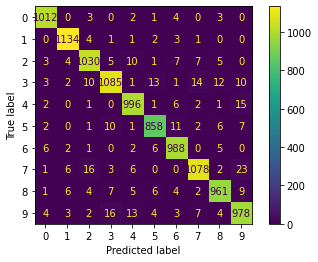

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=150)
classify(model)

**Naive Bayes**

Accuracy: 0.5646666666666667
Precission: 0.6821249192053341
Recall: 0.5646666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80      1025
           1       0.75      0.96      0.84      1146
           2       0.88      0.27      0.42      1072
           3       0.73      0.39      0.51      1151
           4       0.84      0.17      0.28      1024
           5       0.64      0.08      0.15       898
           6       0.61      0.95      0.74      1010
           7       0.90      0.34      0.49      1135
           8       0.31      0.61      0.41      1005
           9       0.38      0.93      0.54      1034

    accuracy                           0.56     10500
   macro avg       0.68      0.56      0.52     10500
weighted avg       0.68      0.56      0.53     10500



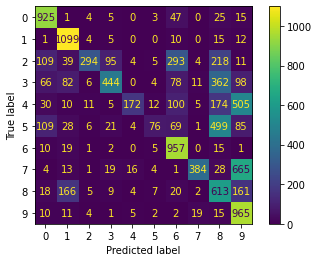

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(priors=None, var_smoothing=1e-09)
classify(model)

**Extra Trees Classifier**

Accuracy: 0.9672380952380952
Precission: 0.9672817643333544
Recall: 0.9672380952380952
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1025
           1       0.98      0.99      0.99      1146
           2       0.96      0.96      0.96      1072
           3       0.97      0.96      0.96      1151
           4       0.97      0.97      0.97      1024
           5       0.97      0.96      0.96       898
           6       0.97      0.98      0.97      1010
           7       0.98      0.96      0.97      1135
           8       0.96      0.95      0.96      1005
           9       0.94      0.95      0.94      1034

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500



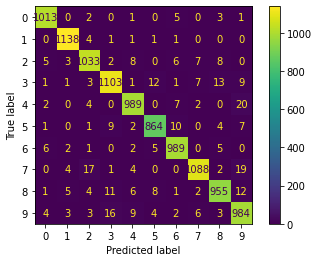

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.9765714285714285
Precission: 0.9766119679771131
Recall: 0.9765714285714285
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1025
           1       0.99      0.99      0.99      1146
           2       0.98      0.98      0.98      1072
           3       0.98      0.97      0.97      1151
           4       0.97      0.98      0.97      1024
           5       0.98      0.96      0.97       898
           6       0.98      0.98      0.98      1010
           7       0.98      0.97      0.98      1135
           8       0.96      0.99      0.97      1005
           9       0.96      0.97      0.96      1034

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500



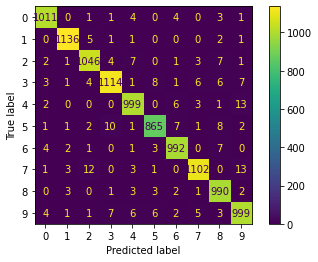

In [19]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(learning_rate=0.2,max_depth=-5,random_state=1)
classify(model)

In [20]:
model = LGBMClassifier()
model.fit(X, y)

LGBMClassifier()

In [21]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
results=model.predict(test)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.head()



,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [23]:
submission.to_csv("submission.csv",index=False)

In [24]:
# from sklearn.svm import SVC
# model = SVC(kernel='linear', random_state=3)
# classify(model)
# from sklearn.svm import SVC
# model = SVC(kernel='poly', random_state=3)
# classify(model)
# from catboost import CatBoostClassifier
# model = CatBoostClassifier(verbose=0)
# classify(model)
# from xgboost import XGBClassifier
# model = XGBClassifier()
# classify(model)